In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mtp
from math import*

In [164]:
import copy
from graphviz import Digraph

In [165]:
## Variables ##

dataset='heart'
split_func='IG'



In [166]:
datasets={'tennis':['https://raw.githubusercontent.com/Kvnpsiddhartha/DecisionTreeImplementation/main/data.csv','PlayTennis'],'cars':['https://raw.githubusercontent.com/Kvnpsiddhartha/DecisionTreeImplementation/main/car.csv','class'],'lenses':['https://raw.githubusercontent.com/Kvnpsiddhartha/DecisionTreeImplementation/main/lenses.csv','Class'],'chess':['https://raw.githubusercontent.com/Kvnpsiddhartha/DecisionTreeImplementation/main/kr-vs-kp.csv','result'],'baloons':['https://raw.githubusercontent.com/Kvnpsiddhartha/DecisionTreeImplementation/main/balloons.csv','inflated'],'lymphography':['https://raw.githubusercontent.com/Kvnpsiddhartha/DecisionTreeImplementation/main/lymphography.csv','no. of nodes in'],'heart':['https://raw.githubusercontent.com/Kvnpsiddhartha/DecisionTreeImplementation/main/SPECT.csv','diagnosis']}

In [167]:
dataset_url,target_name=datasets[dataset]
data=pd.read_csv(dataset_url)
data=data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [168]:
print(data)

    diagnosis  F1  F2  F3  F4  F5  F6  F7  F8  F9  ...  F13  F14  F15  F16  \
0           1   0   0   0   1   0   0   0   1   1  ...    1    1    0    0   
1           1   0   0   1   1   0   0   0   1   1  ...    1    1    0    0   
2           1   1   0   1   0   1   0   0   1   0  ...    1    0    0    0   
3           1   0   0   0   0   0   0   0   0   0  ...    0    0    0    0   
4           1   0   0   0   0   0   0   0   1   0  ...    1    0    1    1   
..        ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...   
75          0   1   0   0   0   1   0   0   0   0  ...    0    0    0    0   
76          0   1   0   0   0   1   1   0   0   1  ...    0    1    0    0   
77          0   1   0   0   0   1   0   0   0   0  ...    0    0    0    0   
78          0   0   0   1   1   0   0   1   0   0  ...    1    1    0    0   
79          0   1   0   0   0   1   0   0   0   0  ...    0    0    0    0   

    F17  F18  F19  F20  F21  F22  
0     0    0    0    0    0 

In [169]:
data

,diagnosis,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22
0,1,0,0,0,1,0,0,0,1,1,...,1,1,0,0,0,0,0,0,0,0
1,1,0,0,1,1,0,0,0,1,1,...,1,1,0,0,0,0,0,0,0,1
2,1,1,0,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
4,1,0,0,0,0,0,0,0,1,0,...,1,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76,0,1,0,0,0,1,1,0,0,1,...,0,1,0,0,0,0,1,1,0,0
77,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
78,0,0,0,1,1,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,1


In [170]:
print(pd.DataFrame(data))
df=pd.DataFrame(data)
df.dtypes

    diagnosis  F1  F2  F3  F4  F5  F6  F7  F8  F9  ...  F13  F14  F15  F16  \
0           1   0   0   0   1   0   0   0   1   1  ...    1    1    0    0   
1           1   0   0   1   1   0   0   0   1   1  ...    1    1    0    0   
2           1   1   0   1   0   1   0   0   1   0  ...    1    0    0    0   
3           1   0   0   0   0   0   0   0   0   0  ...    0    0    0    0   
4           1   0   0   0   0   0   0   0   1   0  ...    1    0    1    1   
..        ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...   
75          0   1   0   0   0   1   0   0   0   0  ...    0    0    0    0   
76          0   1   0   0   0   1   1   0   0   1  ...    0    1    0    0   
77          0   1   0   0   0   1   0   0   0   0  ...    0    0    0    0   
78          0   0   0   1   1   0   0   1   0   0  ...    1    1    0    0   
79          0   1   0   0   0   1   0   0   0   0  ...    0    0    0    0   

    F17  F18  F19  F20  F21  F22  
0     0    0    0    0    0 

diagnosis    int64
F1           int64
F2           int64
F3           int64
F4           int64
F5           int64
F6           int64
F7           int64
F8           int64
F9           int64
F10          int64
F11          int64
F12          int64
F13          int64
F14          int64
F15          int64
F16          int64
F17          int64
F18          int64
F19          int64
F20          int64
F21          int64
F22          int64
dtype: object

In [171]:
print(df.count())
print(sum(df[target_name].value_counts().to_dict().values()))

diagnosis    80
F1           80
F2           80
F3           80
F4           80
F5           80
F6           80
F7           80
F8           80
F9           80
F10          80
F11          80
F12          80
F13          80
F14          80
F15          80
F16          80
F17          80
F18          80
F19          80
F20          80
F21          80
F22          80
dtype: int64
80


In [172]:
import random
def train_test_split(df,test_size):
  df=df.sample(frac = 1)
  n=len(df)
  no_test_rows=int(n*test_size)
  l=list(random.sample(list(range(n)), no_test_rows))
  test=df.iloc[l]
  train=df.drop(l,axis=0)
  return train.sample(frac = 1),test.sample(frac = 1)
# test_df=data
df,test_df=train_test_split(df,0.3)
print(len(df),len(test_df))

# from sklearn.model_selection import train_test_split
# df,test_df=test_train_split(df,test_size=0.3)

56 24


In [173]:
class DecisionTree():
  
  ## Class Member Functions ##

  def entropy_help(p):
    return -p*log(p,2)
  
  def getEntropy(df,target_name):  
    n=df.count()[0]
    target_counts=df[target_name].value_counts().to_dict()
    s=0
    for p in target_counts.values():
      if p/n==1 or p/n==0:
        return 0
      s+=DecisionTree.entropy_help(p/n)
    # print(s)
    return s
  
  def getProbability(df,column,value):
    return df[df[column]==value].count()[0]/df.count()[0]
  
  def informationGain(df,target_name,col):
    # print("Entropy of ",col,DecisionTree.getEntropy(df,target_name))
    total_entropy=DecisionTree.getEntropy(df,target_name)
    col_vals_count=df[col].value_counts().to_dict()
    sum=0
    for value in col_vals_count:
      n=col_vals_count[value]
      # print("Entropy of ",col,value,DecisionTree.getEntropy(df[df[col]==value],target_name))
      sum+=(DecisionTree.getEntropy(df[df[col]==value],target_name)*DecisionTree.getProbability(df,col,value))
    # print("IG: ",target_name,col,total_entropy-sum)
    return total_entropy-sum

  ## Class Data Members ##

  split_functions={'IG':informationGain}
  
  ## Countructor ##
  def __init__(self,df,target_name,split_function="IG",level=-1,leaf_nodes=-1):
    self.tree=self.Tree()
    self.df=df
    self.target_name=target_name
    self.cols=list(self.df.columns)
    self.cols.remove(self.target_name)
    self.cnt=0
    self.gnodes=[]
    self.level=level
    self.leaf_nodes=leaf_nodes
    self.rules=[]
    self.output_classes=self.df[self.target_name].unique()
    if split_function in DecisionTree.split_functions:
      self.split_function=DecisionTree.split_functions[split_function]
    else:
      raise Exception("Split function not found")

  ## Instance Methods ##

  def getGraph(self):
    return self.tree.g

  def find_leaf(self,df):
    counts=df[self.target_name].value_counts().to_dict()
    return max(zip(counts.values(), counts.keys()))[1]
    
      # unique_vals=list(df[self.target_name].unique())
      # for val in unique_vals:      
      #   if df[df[self.target_name]==val].count()[0]==df.count()[0]:
      #     return val

  def construct(self):
    maxig=[-1,""]
    for i in self.cols:
      etemp=self.split_function(df,self.target_name,i)
      maxig=maxig if maxig[0]>etemp else [etemp,i]
    root=self.Node(maxig[1],maxig[0],0)
    self.tree.insert_root(root)
    c=copy.deepcopy(self.cols)
    c.remove(root.name)
    root.gname=str(root)
    self.gnodes.append(root)
    self.tree.g.node(str(root),str(root))
    self.construct_help(df,c,root)

  def construct_help(self,df,cols,parent):
    if not parent.name:
      return
    vals=list(df[parent.name].unique())
    dftemp=df

    for k in vals:
      if self.leaf_nodes!=-1 and self.tree.no_leafs>=self.leaf_nodes:
        return
      df=dftemp
      df=df[df[parent.name]==k]
      e=DecisionTree.getEntropy(df,self.target_name)

      if e==0 or parent.level==self.level-1:
        value=self.find_leaf(df)
        node=self.Node(value,1,parent.level+1)
        node.gname=str(value)
        parent.insert_child(node)
        parent.insert_edge(k)
        self.tree.no_leafs+=1
        name=value
        if not isinstance(value, str):
          name='class'
        self.tree.g.node(name+str(self.cnt),str(value))
        self.tree.g.edge(str(parent.gname),name+str(self.cnt),label=str(k))
        
        self.cnt+=1
        continue
      maxig=[-1,""]
      for i in cols:
        etemp=self.split_function(df,self.target_name,i)
        maxig=maxig if maxig[0]>etemp else [etemp,i]
      node=self.Node(maxig[1],maxig[0],parent.level+1)
      node.gname=str(node.name)
      c=copy.deepcopy(cols)
      if node.name in c:
        c.remove(node.name)
      name=str(node)

      # checking if node name already exist in graphviz code
      
      if name in self.gnodes:
        name+=str(self.cnt)
        self.cnt+=1
      else:
        self.gnodes.append(name)
      node.gname=name

      parent.insert_child(node)
      parent.insert_edge(k)

      self.tree.g.node(name,str(node))
      self.tree.g.edge(str(parent.gname),name,label=str(k))
      
      self.construct_help(df[df[parent.name]==k],c,node)
      
  def predict(self,instances,trace=False):
    node=self.tree.root
    op=[]
    if isinstance(instances,dict):
      return self.predict_help(node,instances,trace,"")
    if isinstance(instances,list):
      
      for instance in instances:
        op.append(self.predict_help(node,instance,trace,""))
    else:
      n=len(instances)
      for i in range(n):
        instance=data.iloc[i].to_dict()
        op.append(self.predict_help(node,instance,trace,""))
    return op

  def predict_help(self,node,instance,trace,path):
    if node.name in self.output_classes:
      if trace:
        print(path+str(node))
      return node.name
    value=instance[node.name]
    try:
      path+=str(node)+" ( "+str(value)+" ) -> "
      ind=node.edges.index(value)
      return self.predict_help(node.childs[ind],instance,trace,path)
    except Exception as e:
      return "Not valid instance, path: "+path
  def get_rules(self):
    node=self.tree.root
    self.rules_help(node,str(node.name)+" -> ")
    return self.rules

  def rules_help(self,node,path):
    for n,e in zip(node.childs,node.edges):
      if n.name in self.output_classes:
        self.rules.append("{} ( {} ) {}".format(path,str(e),str(n.name)))
      self.rules_help(n,"{} ( {} ) {} -> ".format(path,str(e),str(n.name)))
  
  ## Inner classes ##
  class Node:
    ## Countructor ##
    def __init__(self,name,ig,level):
      self.name=name
      self.ig=ig
      self.childs=[]
      self.edges=[]
      self.gname=''
      self.level=level

    ## Instance Methods ##

    def insert_child(self,node):
      self.childs.append(node)

    def insert_edge(self,edge):
      self.edges.append(edge)

    def printn(self,edge=""):
      # if self.childs:
      dashes="|"+"-"*(self.level*5)
      value="( "+str(edge)+") "+str(self.gname) if edge else str(self.gname)
      # print(" "*(self.level*2+1),''.join(['-']*31))
      # print(dashes,'|{:^15} - level - {:^2} | '.format(self.gname,self.level),list(zip(self.edges,list(map(lambda x:x.gname,self.childs)))))
      # print(" "*(self.level*2+1),''.join(['-']*31))
      print(dashes,value)

    def __str__(self):
      return str(self.name)

  class Tree:

    ## Countructor ##
    def __init__(self):
      self.root=None
      self.g=Digraph(encoding='utf-8')
      self.no_leafs=0

    ## Instance Methods ##

    def insert_root(self,node):
      self.root=node

    def printt(self):
      self.print_help(self.root,"")

    def print_help(self,node,edge):
      if node:
        node.printn(edge)
        # print("(",edge,")")
      for i in range(len(node.childs)):
        self.print_help(node.childs[i],node.edges[i])

In [174]:
d=DecisionTree(data,target_name,split_function=split_func)

In [175]:
d.construct()

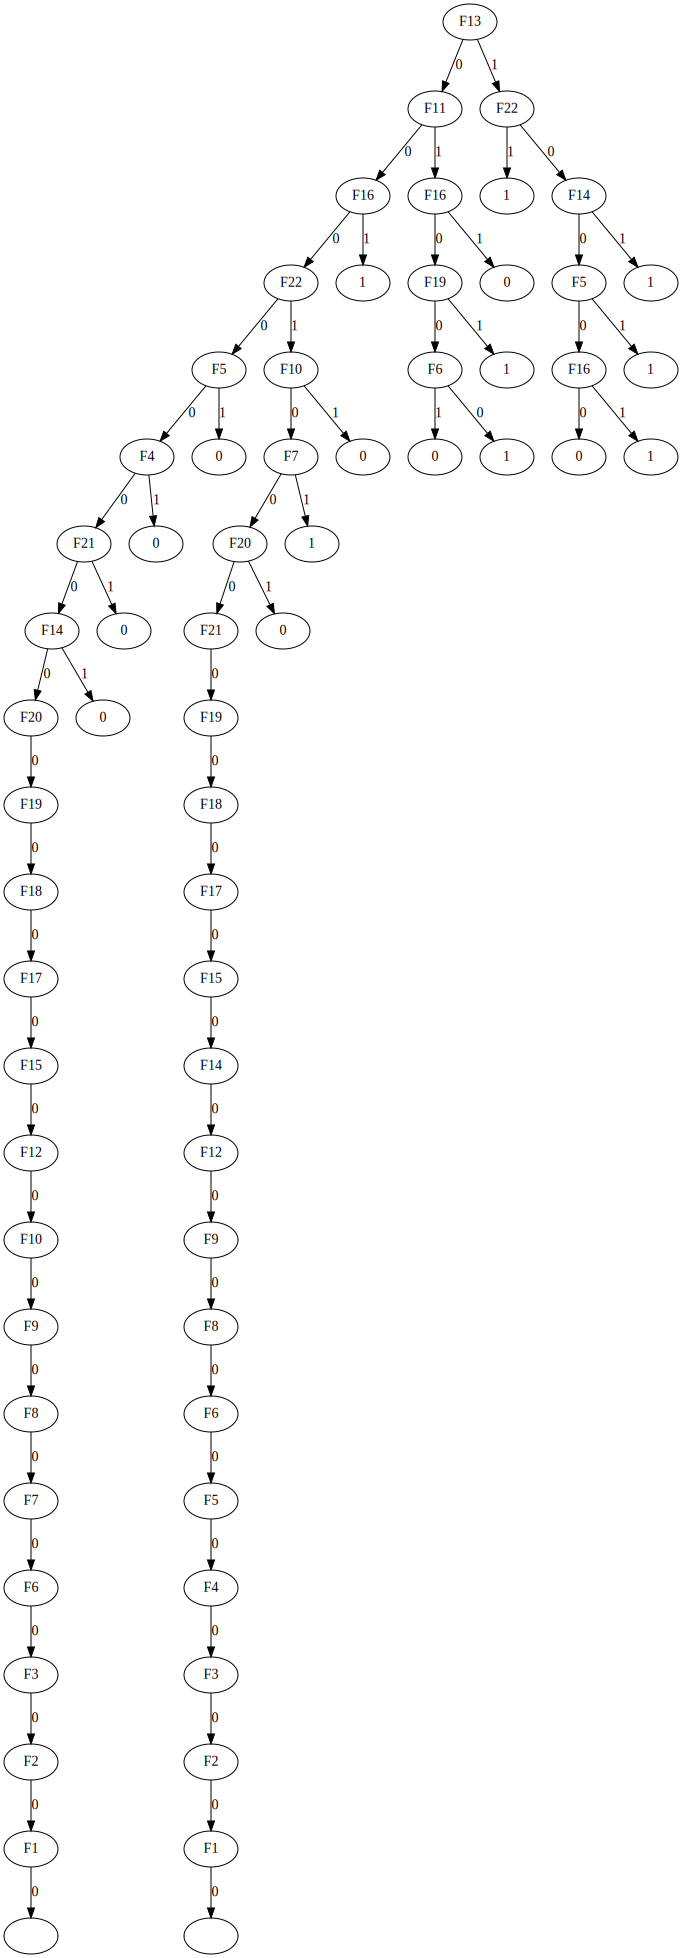

In [176]:
d.getGraph()

In [177]:
print(d.tree.no_leafs)

17


In [178]:
d.get_rules()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


['F13 ->  ( 0 ) F11 ->  ( 0 ) F16 ->  ( 0 ) F22 ->  ( 0 ) F5 ->  ( 0 ) F4 ->  ( 0 ) F21 ->  ( 0 ) F14 ->  ( 1 ) 0',
 'F13 ->  ( 0 ) F11 ->  ( 0 ) F16 ->  ( 0 ) F22 ->  ( 0 ) F5 ->  ( 0 ) F4 ->  ( 0 ) F21 ->  ( 1 ) 0',
 'F13 ->  ( 0 ) F11 ->  ( 0 ) F16 ->  ( 0 ) F22 ->  ( 0 ) F5 ->  ( 0 ) F4 ->  ( 1 ) 0',
 'F13 ->  ( 0 ) F11 ->  ( 0 ) F16 ->  ( 0 ) F22 ->  ( 0 ) F5 ->  ( 1 ) 0',
 'F13 ->  ( 0 ) F11 ->  ( 0 ) F16 ->  ( 0 ) F22 ->  ( 1 ) F10 ->  ( 0 ) F7 ->  ( 0 ) F20 ->  ( 1 ) 0',
 'F13 ->  ( 0 ) F11 ->  ( 0 ) F16 ->  ( 0 ) F22 ->  ( 1 ) F10 ->  ( 0 ) F7 ->  ( 1 ) 1',
 'F13 ->  ( 0 ) F11 ->  ( 0 ) F16 ->  ( 0 ) F22 ->  ( 1 ) F10 ->  ( 1 ) 0',
 'F13 ->  ( 0 ) F11 ->  ( 0 ) F16 ->  ( 1 ) 1',
 'F13 ->  ( 0 ) F11 ->  ( 1 ) F16 ->  ( 0 ) F19 ->  ( 0 ) F6 ->  ( 1 ) 0',
 'F13 ->  ( 0 ) F11 ->  ( 1 ) F16 ->  ( 0 ) F19 ->  ( 0 ) F6 ->  ( 0 ) 1',
 'F13 ->  ( 0 ) F11 ->  ( 1 ) F16 ->  ( 0 ) F19 ->  ( 1 ) 1',
 'F13 ->  ( 0 ) F11 ->  ( 1 ) F16 ->  ( 1 ) 0',
 'F13 ->  ( 1 ) F22 ->  ( 1 ) 1',
 'F13 -> 

In [179]:
inp=[]
n=1000
n=n if n < len(test_df) else len(test_df)
for i in range(n):
  inp.append(test_df.iloc[i].to_dict())
print(d.predict(inp))

[1, 'Not valid instance, path: F13 ( 0 ) -> F11 ( 0 ) -> F16 ( 0 ) -> F22 ( 0 ) -> F5 ( 0 ) -> F4 ( 0 ) -> F21 ( 0 ) -> F14 ( 0 ) -> F20 ( 0 ) -> F19 ( 0 ) -> F18 ( 0 ) -> F17 ( 0 ) -> F15 ( 0 ) -> F12 ( 0 ) -> F10 ( 0 ) -> F9 ( 0 ) -> F8 ( 0 ) -> F7 ( 0 ) -> F6 ( 0 ) -> F3 ( 0 ) -> F2 ( 0 ) -> F1 ( 0 ) -> ', 1, 1, 'Not valid instance, path: F13 ( 0 ) -> F11 ( 0 ) -> F16 ( 0 ) -> F22 ( 0 ) -> F5 ( 0 ) -> F4 ( 0 ) -> F21 ( 0 ) -> F14 ( 0 ) -> F20 ( 0 ) -> F19 ( 0 ) -> F18 ( 0 ) -> F17 ( 0 ) -> F15 ( 0 ) -> F12 ( 0 ) -> F10 ( 0 ) -> F9 ( 0 ) -> F8 ( 0 ) -> F7 ( 0 ) -> F6 ( 0 ) -> F3 ( 0 ) -> F2 ( 0 ) -> F1 ( 0 ) -> ', 0, 'Not valid instance, path: F13 ( 0 ) -> F11 ( 0 ) -> F16 ( 0 ) -> F22 ( 0 ) -> F5 ( 0 ) -> F4 ( 0 ) -> F21 ( 0 ) -> F14 ( 0 ) -> F20 ( 0 ) -> F19 ( 0 ) -> F18 ( 0 ) -> F17 ( 0 ) -> F15 ( 0 ) -> F12 ( 0 ) -> F10 ( 0 ) -> F9 ( 0 ) -> F8 ( 0 ) -> F7 ( 0 ) -> F6 ( 0 ) -> F3 ( 0 ) -> F2 ( 0 ) -> F1 ( 0 ) -> ', 'Not valid instance, path: F13 ( 0 ) -> F11 ( 0 ) -> F16 ( 0 ) -> 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


In [180]:
d.tree.printt()

| F13
|----- F11
|---------- F16
|--------------- F22
|-------------------- F5
|------------------------- F4
|------------------------------ F21
|----------------------------------- F14
|---------------------------------------- F20
|--------------------------------------------- F19
|-------------------------------------------------- F18
|------------------------------------------------------- F17
|------------------------------------------------------------ F15
|----------------------------------------------------------------- F12
|---------------------------------------------------------------------- F10
|--------------------------------------------------------------------------- F9
|-------------------------------------------------------------------------------- F8
|------------------------------------------------------------------------------------- F7
|------------------------------------------------------------------------------------------ F6
|------------------------------------

In [181]:
o=list(enumerate(d.predict(data)))
o

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 0),
 (24, 1),
 (25, 1),
 (26, 0),
 (27,
  'Not valid instance, path: F13 ( 0 ) -> F11 ( 0 ) -> F16 ( 0 ) -> F22 ( 0 ) -> F5 ( 0 ) -> F4 ( 0 ) -> F21 ( 0 ) -> F14 ( 0 ) -> F20 ( 1 ) -> '),
 (28,
  'Not valid instance, path: F13 ( 0 ) -> F11 ( 0 ) -> F16 ( 0 ) -> F22 ( 1 ) -> F10 ( 0 ) -> F7 ( 0 ) -> F20 ( 0 ) -> F21 ( 0 ) -> F19 ( 0 ) -> F18 ( 0 ) -> F17 ( 0 ) -> F15 ( 0 ) -> F14 ( 0 ) -> F12 ( 0 ) -> F9 ( 0 ) -> F8 ( 0 ) -> F6 ( 0 ) -> F5 ( 0 ) -> F4 ( 0 ) -> F3 ( 0 ) -> F2 ( 0 ) -> F1 ( 0 ) -> '),
 (29, 1),
 (30,
  'Not valid instance, path: F13 ( 0 ) -> F11 ( 0 ) -> F16 ( 0 ) -> F22 ( 0 ) -> F5 ( 0 ) -> F4 ( 0 ) -> F21 ( 0 ) -> F14 ( 0 ) -> F20 ( 0 ) -> F19 ( 0 ) -> F18 ( 0 ) -> F17 ( 0 ) -> F15 ( 0 ) -> F12 ( 0 ) -> F10 ( 0 ) -> F9 ( 0 ) -> F8 ( 0 ) -> F7 ( 0 )

In [182]:
data[target_name]

0     1
1     1
2     1
3     1
4     1
     ..
75    0
76    0
77    0
78    0
79    0
Name: diagnosis, Length: 80, dtype: int64

In [183]:
count=0
for i in o:
  if i[1]=='Not valid instance':
    print("Something went wrong")
    count+=1
print(count)

0


In [184]:
print(df.iloc[0].to_dict())
d.predict(df.iloc[0].to_dict(),trace=True)

{'diagnosis': 0, 'F1': 0, 'F2': 0, 'F3': 0, 'F4': 0, 'F5': 0, 'F6': 0, 'F7': 0, 'F8': 0, 'F9': 0, 'F10': 0, 'F11': 0, 'F12': 0, 'F13': 0, 'F14': 0, 'F15': 0, 'F16': 0, 'F17': 0, 'F18': 0, 'F19': 0, 'F20': 0, 'F21': 0, 'F22': 0}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


'Not valid instance, path: F13 ( 0 ) -> F11 ( 0 ) -> F16 ( 0 ) -> F22 ( 0 ) -> F5 ( 0 ) -> F4 ( 0 ) -> F21 ( 0 ) -> F14 ( 0 ) -> F20 ( 0 ) -> F19 ( 0 ) -> F18 ( 0 ) -> F17 ( 0 ) -> F15 ( 0 ) -> F12 ( 0 ) -> F10 ( 0 ) -> F9 ( 0 ) -> F8 ( 0 ) -> F7 ( 0 ) -> F6 ( 0 ) -> F3 ( 0 ) -> F2 ( 0 ) -> F1 ( 0 ) -> '